In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('dataset.csv')

In [2]:
data.columns
data.columns = data.columns.str.strip()


In [3]:
 
data['Date_of_Purchase'] = pd.to_datetime(data['Date_of_Purchase'], format='%d-%m-%Y', errors='coerce')

 
invalid_dates = data['Date_of_Purchase'].isna().sum()
if invalid_dates > 0:
    print(f"Warning: {invalid_dates} rows have invalid dates and will be dropped.")
    data = data.dropna(subset=['Date_of_Purchase'])

 
print(f"Date range: {data['Date_of_Purchase'].min()} to {data['Date_of_Purchase'].max()}")

 
data = data[data['Date_of_Purchase'].dt.month != 12]

Date range: 2023-01-01 00:00:00 to 2023-12-01 00:00:00


In [4]:
data = data[data['Date_of_Purchase'].dt.month != 12]


In [5]:
data['Month'] = data['Date_of_Purchase'].dt.to_period('M')
data['Month'].unique()

<PeriodArray>
['2023-10', '2023-06', '2023-09', '2023-05', '2023-01', '2023-07', '2023-02',
 '2023-03', '2023-08', '2023-11', '2023-04']
Length: 11, dtype: period[M]

In [6]:
data.columns



Index(['Customer_ID', 'Age_Group', 'Gender', 'Region', 'Income_Bracket',
       'Customer_Loyalty_Level', 'Churned', 'Product_ID', 'Category',
       'Sub_Category', 'Brand', 'Price', 'Order_ID', 'Date_of_Purchase',
       'Quantity', 'Discount', 'Sales_Amount', 'Payment_Method',
       'Stock_Availability', 'Delivery_Time', 'Return_Status', 'Rating',
       'Promotion_Applied', 'Festival_Season', 'Browsing_History_Score',
       'Time_Spent_on_Site', 'Profit', 'Profit_Margin', 'Last_Purchase',
       'Total_Orders', 'Month'],
      dtype='object')

In [7]:
data['Region'].unique()

array(['Kolkata', 'Delhi', 'Bengaluru', 'Mumbai'], dtype=object)

In [8]:
data['Sub_Category'].unique()

array(['Mobile', 'Laptop', 'Shirts', 'Kitchenware', 'Shoes'], dtype=object)

In [9]:
 
data.isnull().sum()


Customer_ID               0
Age_Group                 0
Gender                    0
Region                    0
Income_Bracket            0
Customer_Loyalty_Level    0
Churned                   0
Product_ID                0
Category                  0
Sub_Category              0
Brand                     0
Price                     0
Order_ID                  0
Date_of_Purchase          0
Quantity                  0
Discount                  0
Sales_Amount              0
Payment_Method            0
Stock_Availability        0
Delivery_Time             0
Return_Status             0
Rating                    0
Promotion_Applied         0
Festival_Season           0
Browsing_History_Score    0
Time_Spent_on_Site        0
Profit                    0
Profit_Margin             0
Last_Purchase             0
Total_Orders              0
Month                     0
dtype: int64

In [10]:
 
total_revenue = data['Sales_Amount'].sum()
print(f"Total Revenue : ₹{total_revenue:.2f}")

Total Revenue : ₹225282827.34


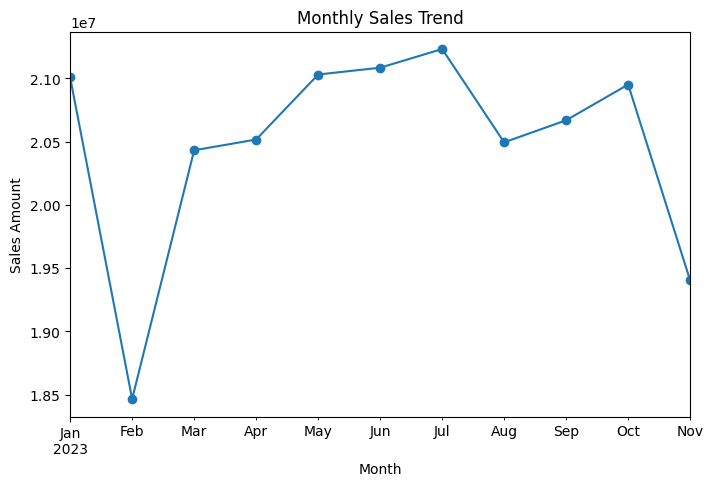

Insight: The highest sales occurred in 2023-07, while the lowest sales occurred in 2023-02.
Consider exploring reasons for these variations and leveraging high-demand periods.


In [11]:
 
data['Date_of_Purchase'] = pd.to_datetime(data['Date_of_Purchase'], dayfirst=True, errors='coerce')
 
invalid_dates = data['Date_of_Purchase'].isna().sum()
if invalid_dates > 0:
    print(f"Warning: {invalid_dates} rows have invalid dates and will be dropped.")
    data = data.dropna(subset=['Date_of_Purchase'])

 
data['Month'] = data['Date_of_Purchase'].dt.to_period('M')
 
monthly_sales = data.groupby('Month')['Sales_Amount'].sum()
 
monthly_sales.plot(kind='line', figsize=(8,5), title="Monthly Sales Trend", ylabel="Sales Amount", marker='o')
plt.show()

 
peak_month = monthly_sales.idxmax()
lowest_month = monthly_sales.idxmin()
print(f"Insight: The highest sales occurred in {peak_month}, while the lowest sales occurred in {lowest_month}.")
print("Consider exploring reasons for these variations and leveraging high-demand periods.")


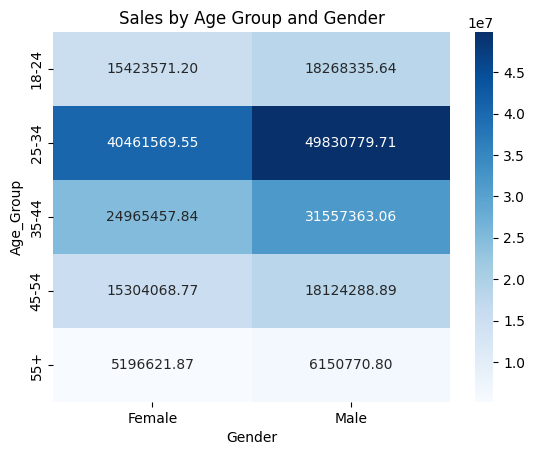

Insight: The age group '25-34' generates the highest sales. Focus marketing efforts on this group to maximize revenue.

Churned
0    81.967213
1    18.032787
Name: proportion, dtype: float64
Insight: The churn rate is low, indicating good customer retention.



In [12]:
 segmentation = data.groupby(['Age_Group', 'Gender'])['Sales_Amount'].sum().reset_index()

 
pivot_table = segmentation.pivot(index='Age_Group', columns='Gender', values='Sales_Amount')

 
sns.heatmap(pivot_table, annot=True, cmap="Blues", fmt=".2f")
plt.title("Sales by Age Group and Gender")
plt.show()

 
top_age_group = segmentation.groupby('Age_Group')['Sales_Amount'].sum().idxmax()
print(f"Insight: The age group '{top_age_group}' generates the highest sales. Focus marketing efforts on this group to maximize revenue.\n")

 
churn_rate = data['Churned'].value_counts(normalize=True) * 100
print(churn_rate)
if churn_rate.get("Yes", 0) > 20:
    print("Insight: The churn rate is high. Consider implementing retention strategies such as loyalty programs or personalized discounts.")
else:
    print("Insight: The churn rate is low, indicating good customer retention.\n")



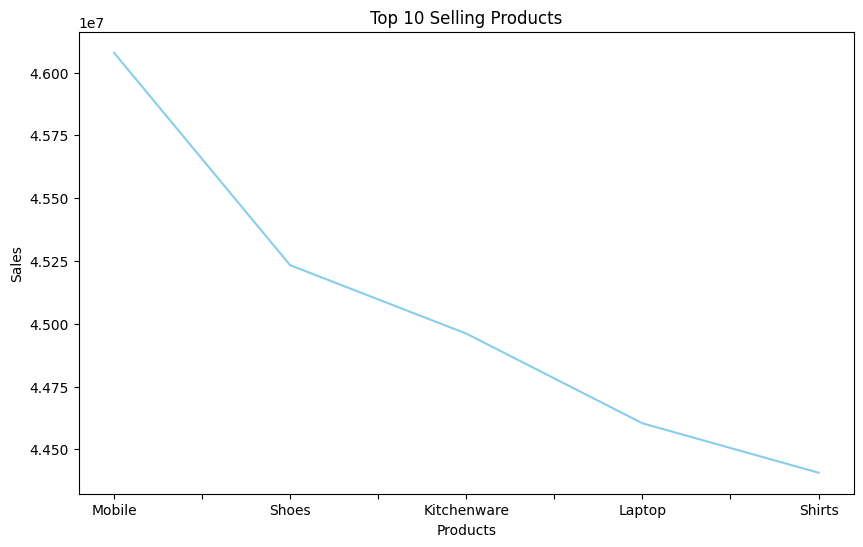

Insight: Product 'Mobile' is the top seller. 
Ensure adequate inventory for this product and consider bundling it with slower-moving items.



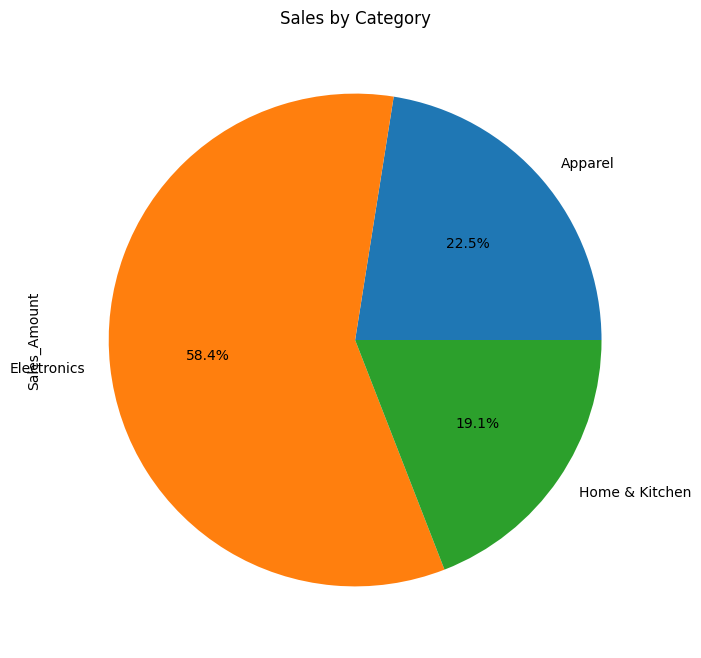

Insight: The category 'Electronics' generates the most sales.
 Focus marketing campaigns on this category to capitalize on its popularity.



In [13]:
 
top_products = data.groupby('Sub_Category')['Sales_Amount'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='line', figsize=(10, 6), title="Top 10 Selling Products", ylabel="Sales",xlabel = "Products", color='skyblue')
plt.show()

best_selling_product = top_products.idxmax()
print(f"Insight: Product '{best_selling_product}' is the top seller. ")
print("Ensure adequate inventory for this product and consider bundling it with slower-moving items.\n")

 
category_sales = data.groupby('Category')['Sales_Amount'].sum()
category_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title="Sales by Category")
plt.show()

top_category = category_sales.idxmax()
print(f"Insight: The category '{top_category}' generates the most sales.")
print(" Focus marketing campaigns on this category to capitalize on its popularity.\n")


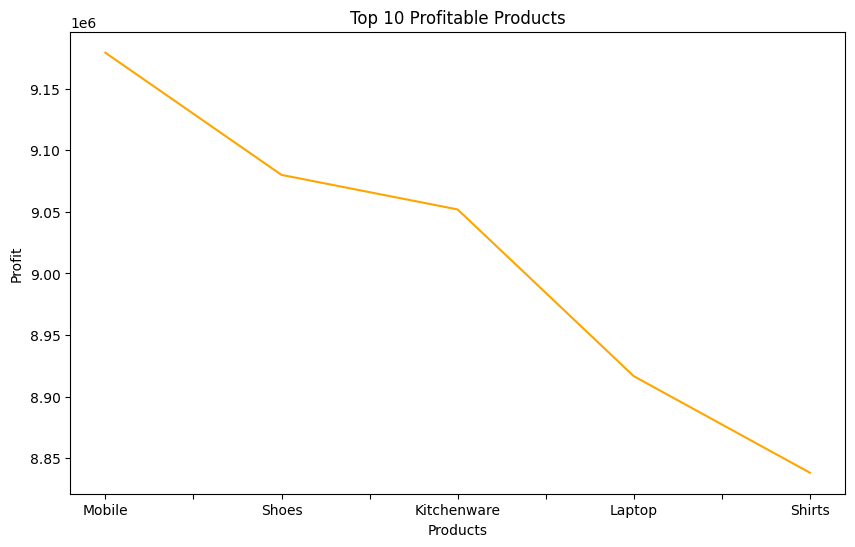

Insight: Product ID 'Mobile' has the highest profit. Prioritize this product in marketing and promotions to maximize profitability.



In [14]:
 
top_profit_products = data.groupby('Sub_Category')['Profit'].sum().sort_values(ascending=False).head(10)
top_profit_products.plot(kind='line', figsize=(10, 6), title="Top 10 Profitable Products", ylabel="Profit",xlabel='Products', color='orange')
plt.show()

highest_profit_product = top_profit_products.idxmax()
print(f"Insight: Product ID '{highest_profit_product}' has the highest profit. Prioritize this product in marketing and promotions to maximize profitability.\n")


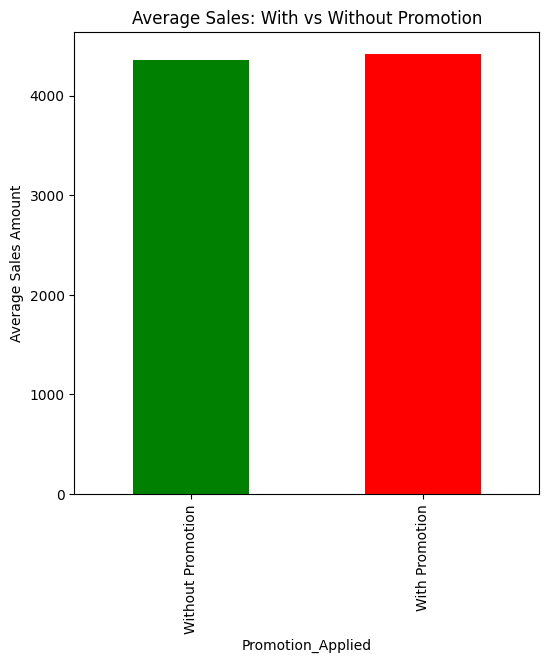

Insight: Promotions increased average sales per order by ₹59.65. Use targeted promotions to boost revenue.


In [15]:
 
promo_impact = data.groupby('Promotion_Applied')['Sales_Amount'].mean()
promo_impact.plot(kind='bar', figsize=(6, 6), title="Average Sales: With vs Without Promotion", ylabel="Average Sales Amount", color=['green', 'red'])
plt.xticks([0, 1], ['Without Promotion', 'With Promotion'])
plt.show()

if promo_impact.loc["Yes"] > promo_impact.loc["No"]:
    print(f"Insight: Promotions increased average sales per order by ₹{promo_impact.loc['Yes'] - promo_impact.loc['No']:.2f}. Use targeted promotions to boost revenue.")
else:
    print("Insight: Promotions did not significantly increase sales. Reevaluate the effectiveness of your promotion strategy.\n")



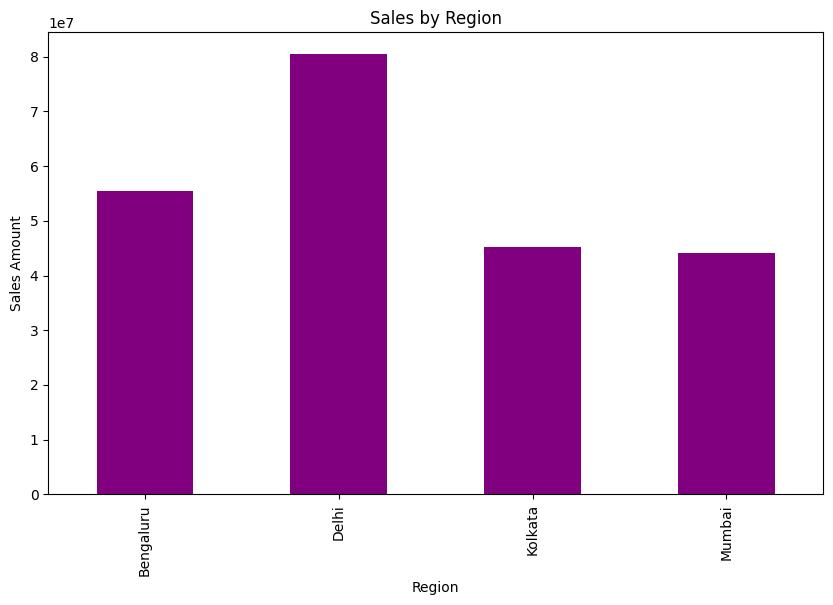

Insight: The region 'Delhi' contributes the most to sales, while 'Mumbai' has the lowest sales. Consider expanding operations or increasing marketing in underperforming regions.



In [16]:
 
region_sales = data.groupby('Region')['Sales_Amount'].sum()
region_sales.plot(kind='bar', figsize=(10, 6), title="Sales by Region", ylabel="Sales Amount", color='purple')
plt.show()

top_region = region_sales.idxmax()
lowest_region = region_sales.idxmin()
print(f"Insight: The region '{top_region}' contributes the most to sales, while '{lowest_region}' has the lowest sales. Consider expanding operations or increasing marketing in underperforming regions.\n")


In [17]:
data['Profit']


0         123.140102
1         378.373839
2         678.675634
3         307.497866
4          62.869209
            ...     
51665     188.043974
51666     299.300735
51667    1276.183116
51668     141.798990
51669    2043.867854
Name: Profit, Length: 51484, dtype: float64

In [18]:
 
data['Date_of_Purchase'] = pd.to_datetime(data['Date_of_Purchase'], format='%d-%m-%Y')


In [19]:
 
data['Date_of_Purchase'] = pd.to_datetime(data['Date_of_Purchase'], dayfirst=True, errors='coerce')


In [20]:
data['Month'] = data['Date_of_Purchase'].dt.to_period('M')
monthly_profit = data.groupby('Month')['Profit'].sum().reset_index()
# Disable scientific notation
pd.options.display.float_format = '{:,.2f}'.format

print(monthly_profit)





      Month       Profit
0   2023-01 4,193,466.22
1   2023-02 3,684,899.36
2   2023-03 4,115,905.94
3   2023-04 4,151,081.94
4   2023-05 4,215,959.08
5   2023-06 4,224,270.85
6   2023-07 4,242,954.57
7   2023-08 4,077,537.47
8   2023-09 4,136,375.61
9   2023-10 4,172,788.98
10  2023-11 3,850,706.51


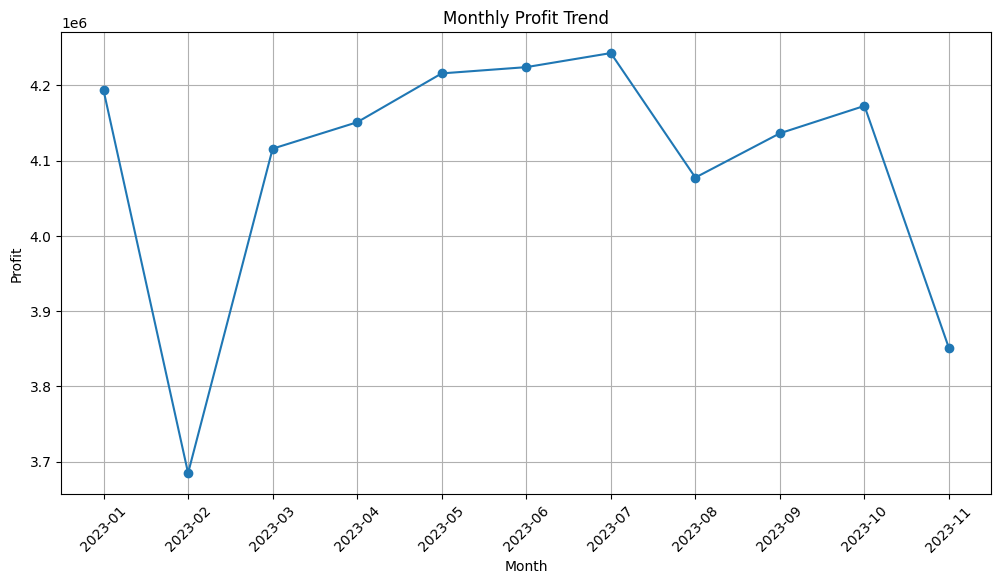

In [21]:
import matplotlib.pyplot as plt

# Plot profit trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_profit['Month'].astype(str), monthly_profit['Profit'], marker='o')
plt.title("Monthly Profit Trend")
plt.xlabel("Month")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [22]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")


# Set the index for time-series modeling
monthly_profit.set_index('Month', inplace=True)

# Build ARIMA model
model = ARIMA(monthly_profit['Profit'], order=(1, 1, 1))
# Adjust order based on your data
model_fit = model.fit()

# Forecast future profits
forecast = model_fit.forecast(steps=6)  # Forecast for 6 months
print("Forecasted Profits:")
print(forecast)


Forecasted Profits:
2023-12   3,889,266.91
2024-01   3,870,134.16
2024-02   3,879,627.38
2024-03   3,874,917.07
2024-04   3,877,254.21
2024-05   3,876,094.58
Freq: M, Name: predicted_mean, dtype: float64


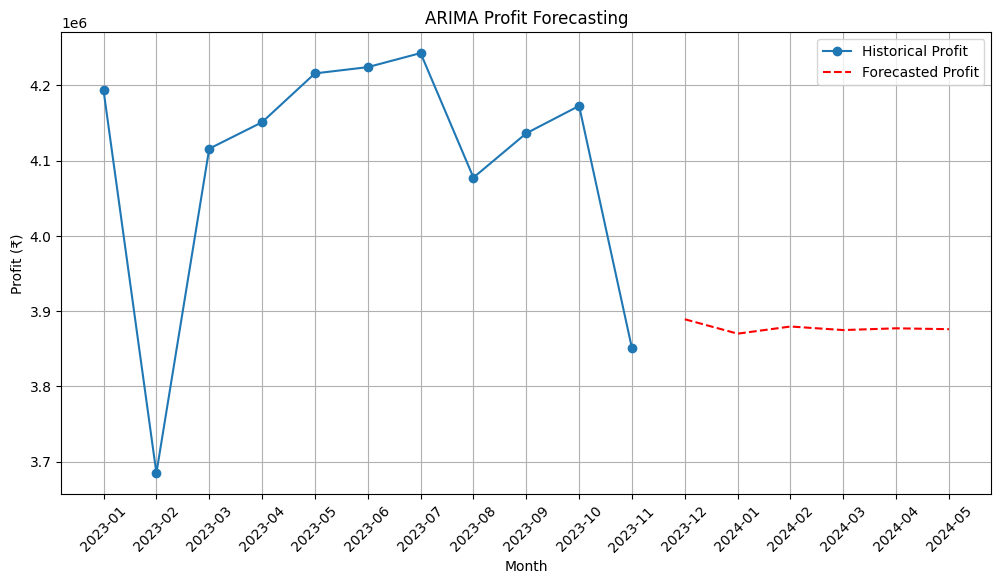

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_profit.index.astype(str), monthly_profit['Profit'], label="Historical Profit", marker='o')
plt.plot(forecast.index.astype(str), forecast, label="Forecasted Profit", linestyle='--', color='red')
plt.title("ARIMA Profit Forecasting")
plt.xlabel("Month")
plt.ylabel("Profit (₹)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()